# U.S. Medical Insurance Costs

In [2]:
#importing the file

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [4]:
import csv 
import pandas as pd
import numpy as np
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Scope: Trying to predict charges based on categorical labels such as sex, smoker, region 

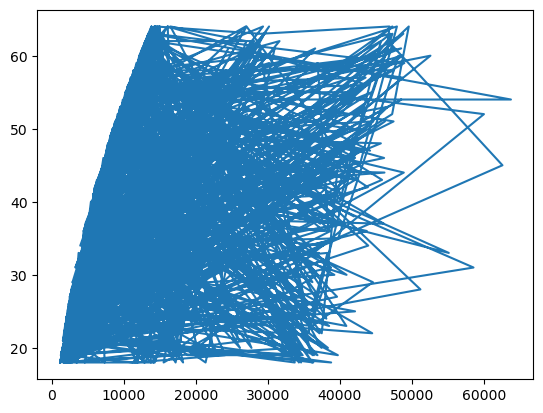

In [11]:
y_plot = data ["age"]
x_plot = data ["charges"]
plt.plot(x_plot, y_plot)
plt.show()
# no clear trend between age and chargers 


In [7]:
#counting null values in data 
missing = pd.isnull(data)
print(missing)
for i in range(data.shape[0]):
    isnull = False
    for j in range(data.shape[1]):
        isnull = isnull or pd.isnull(data.iloc[i][j])
        if isnull == True: 
            print('row ', i, 'has null status ', isnull)

        age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]


### Building a new column to assign dummy inputs 1 and 0, based on the how the charges compare to mean charges 

In [8]:
#build a new coloum - 1 if charges are above mean chargers and 0 if they are below or equal to mean chargers
data["above mean charges"] = data["charges"].apply(lambda x:0 if x <= np.mean(data["charges"]) else 1)
print(data["above mean charges"])

0       1
1       0
2       0
3       1
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: above mean charges, Length: 1338, dtype: int64


### Defining Input and Target Variables 

In [12]:
#independent variables
X = data[["sex", "smoker", "children", "region"]]
print(X.shape)
#target variable
Y = data[["above mean charges"]]
print(Y.shape)
print(X)
print(Y)

(1338, 4)
(1338, 1)
         sex smoker  children     region
0     female    yes         0  southwest
1       male     no         1  southeast
2       male     no         3  southeast
3       male     no         0  northwest
4       male     no         0  northwest
...      ...    ...       ...        ...
1333    male     no         3  northwest
1334  female     no         0  northeast
1335  female     no         0  southeast
1336  female     no         0  southwest
1337  female    yes         0  northwest

[1338 rows x 4 columns]
      above mean charges
0                      1
1                      0
2                      0
3                      1
4                      0
...                  ...
1333                   0
1334                   0
1335                   0
1336                   0
1337                   1

[1338 rows x 1 columns]


### Assigning numerical values to categorical lables using LabelEncoder

In [62]:
#making labels into numericals 
from sklearn.preprocessing import LabelEncoder

In [63]:
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

In [64]:
X["sex_n"] = le_sex.fit_transform(X["sex"])
X["smoker_n"] = le_smoker.fit_transform(X["smoker"])
X["region_n"] = le_region.fit_transform(X["region"])
X.head()

/var/folders/rx/brz6q2n973z4l89ldg3vtbqw0000gn/T/ipykernel_2893/2873555601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["sex_n"] = le_sex.fit_transform(X["sex"])
/var/folders/rx/brz6q2n973z4l89ldg3vtbqw0000gn/T/ipykernel_2893/2873555601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["smoker_n"] = le_smoker.fit_transform(X["smoker"])
/var/folders/rx/brz6q2n973z4l89ldg3vtbqw0000gn/T/ipykernel_2893/2873555601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,sex,smoker,children,region,sex_n,smoker_n,region_n
0,female,yes,0,southwest,0,1,3
1,male,no,1,southeast,1,0,2
2,male,no,3,southeast,1,0,2
3,male,no,0,northwest,1,0,1
4,male,no,0,northwest,1,0,1


In [65]:
X_n = X.drop(["sex","smoker","region"], axis = "columns")
X_n

,children,sex_n,smoker_n,region_n
0,0,0,1,3
1,1,1,0,2
2,3,1,0,2
3,0,1,0,1
4,0,1,0,1
...,...,...,...,...
1333,3,1,0,1
1334,0,0,0,0
1335,0,0,0,2
1336,0,0,0,3


### Label Encoder assigns numerical value to categorical labels: 
- For Sex: 0 = Female, 1 = Male 
- For Smoker: 0 = yes, 1 = No 
- For Region: 0 = northeast , 1 = northwest, 2 = southeast, 3 = southwest

### Using Decision Tree Classification Algorithm, building a model that predicts the if charges are above or below mean charges based on input labels 

In [66]:
# building the classification model 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y, test_size=0.2, random_state=42)

In [67]:
model = tree.DecisionTreeClassifier(max_depth = 10)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10)

In [50]:
predictions = model.predict(X_test)
print(predictions)

[0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0]


In [51]:
#accuracy score 
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9067164179104478


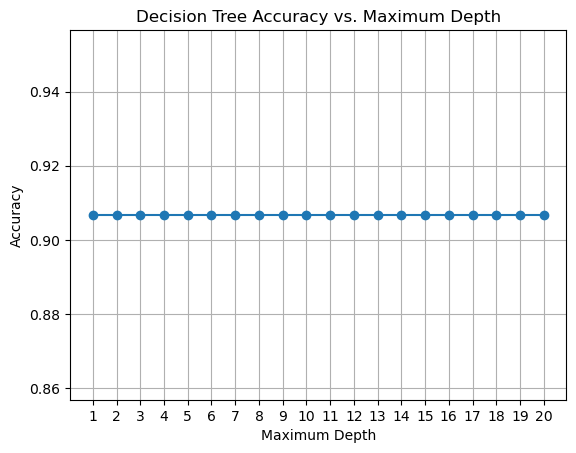

In [59]:
#running classification for a range of max_depth values 

max_depth_values = range(1, 21)
accuracies = []
for max_depth in max_depth_values:
    model = tree.DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    accuracies.append(accuracy)
    
plt.plot(max_depth_values, accuracies, marker='o')
plt.title('Decision Tree Accuracy vs. Maximum Depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()


### The following graph shows that changing that parameter (max no. of nodes) does not significantly affect the accuracy of the model

### Making Prediction based on new data 

In [60]:
#predictions 

model.predict([[3, 1, 0, 1]]) #3 children, male, non smoker, northwest region 

/Users/aa/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

Based on our model, someone with 3 chilren, Male, Non-Smoker, from Northeast region, will have charges less than or equal to the average 

In [61]:
model.predict([[2, 1, 1, 2]]) #2 children, male, smoker, 

/Users/aa/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

Based on our model, someone with 2 chilren, Male, Smoker, from Southeast region, will have charges more than average